In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import r2_score,accuracy_score
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold
from sklearn.ensemble import BaggingRegressor,RandomForestClassifier,StackingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cancer=pd.read_csv("BreastCancer.csv",index_col=0)
X=cancer.drop('Class',axis=1)
y=cancer['Class']

In [22]:
prcomp=PCA()
scores=prcomp.fit_transform(X)

In [4]:
print(np.cumsum(prcomp.explained_variance_ratio_))

[0.68921486 0.76174905 0.82272772 0.86708471 0.90608188 0.94065771
 0.96593481 0.98860165 1.        ]


In [5]:
PCs=pd.DataFrame({'PC1':scores[:,0],
                 'PC2':scores[:,1],
                 'Class':y})

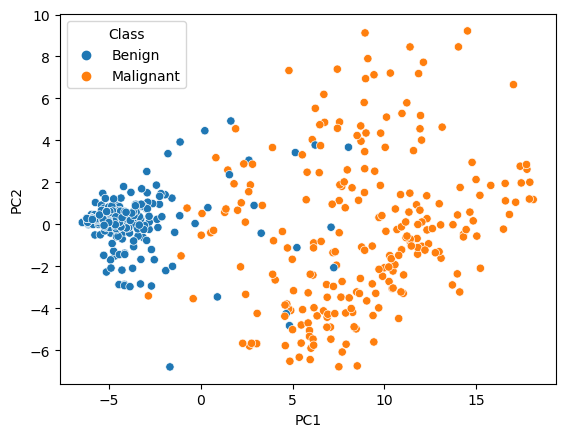

In [6]:
sns.scatterplot(data=PCs,x='PC1',y='PC2',hue='Class')
plt.show()

# Original Dataset

In [7]:
X.columns

Index(['Clump', 'UniCell_Size', 'Uni_CellShape', 'MargAdh', 'SEpith', 'BareN',
       'BChromatin', 'NoemN', 'Mitoses'],
      dtype='object')

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=23,stratify=y)

In [9]:
svm=SVC(kernel='linear',random_state=23,probability=True)

In [10]:
svm.fit(X_train,y_train)

SVC(kernel='linear', probability=True, random_state=23)

In [11]:
y_pred=svm.predict(X_test)
y_pred

array(['Malignant', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign',
       'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign',
       'Benign', 'Malignant', 'Benign', 'Benign', 'Benign', 'Malignant',
       'Malignant', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign',
       'Benign', 'Benign', 'Malignant', 'Malignant', 'Malignant',
       'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Malignant',
       'Benign', 'Malignant', 'Benign', 'Benign', 'Malignant', 'Benign',
       'Malignant', 'Benign', 'Benign', 'Malignant', 'Benign',
       'Malignant', 'Malignant', 'Benign', 'Benign', 'Benign',
       'Malignant', 'Benign', 'Benign', 'Benign', 'Benign', 'Malignant',
       'Malignant', 'Benign', 'Malignant', 'Benign', 'Benign', 'Benign',
       'Malignant', 'Malignant', 'Malignant', 'Malignant', 'Benign',
       'Benign', 'Benign', 'Malignant', 'Malignant', 'Malignant',
       'Benign', 'Benign', 'Benign', 'Benign', 'Malignant', 'Benign',
       'Malignant', 'Benign', 'Ben

In [12]:
print("Accuracy with Original: ")
print(accuracy_score(y_test,y_pred))

Accuracy with Original: 
0.9476190476190476


# Using PCA Score (1st 3 PC)

In [13]:
prcomp=PCA()

In [14]:
train_scores=prcomp.fit_transform(X_train)
test_scores=prcomp.transform(X_test)

In [15]:
svm.fit(train_scores[:,0:3],y_train)

SVC(kernel='linear', probability=True, random_state=23)

In [16]:
y_pred=svm.predict(test_scores[:,0:3])
y_pred

array(['Malignant', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign',
       'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign',
       'Benign', 'Malignant', 'Benign', 'Benign', 'Benign', 'Malignant',
       'Malignant', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign',
       'Benign', 'Malignant', 'Malignant', 'Malignant', 'Malignant',
       'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Malignant',
       'Benign', 'Malignant', 'Benign', 'Benign', 'Malignant', 'Benign',
       'Malignant', 'Benign', 'Benign', 'Malignant', 'Benign',
       'Malignant', 'Malignant', 'Benign', 'Benign', 'Benign',
       'Malignant', 'Benign', 'Benign', 'Benign', 'Benign', 'Malignant',
       'Malignant', 'Benign', 'Malignant', 'Benign', 'Benign', 'Benign',
       'Malignant', 'Malignant', 'Malignant', 'Malignant', 'Benign',
       'Benign', 'Benign', 'Malignant', 'Malignant', 'Malignant',
       'Benign', 'Benign', 'Benign', 'Benign', 'Malignant', 'Malignant',
       'Malignant', 'Benign'

In [17]:
print(accuracy_score(y_test,y_pred))

0.9571428571428572


# Using PCA Score (1st 2 PC)

In [18]:
train_scores=prcomp.fit_transform(X_train)
test_scores=prcomp.transform(X_test)
svm.fit(train_scores[:,0:2],y_train)
y_pred=svm.predict(test_scores[:,0:2])
print("Accuracy for 1st 2 PC: ")
print(accuracy_score(y_test,y_pred))

Accuracy for 1st 2 PC: 
0.9619047619047619


## PCA on X 

#### (Not standard way)

In [19]:
scores=prcomp.fit_transform(X)

In [20]:
X_train,X_test,y_train,y_test=train_test_split(scores[:,0:3],y,test_size=0.3,random_state=23)

In [21]:
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9619047619047619
